# EDA

In [13]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
h5_file_paths = [
    "/Users/marcusschou/Desktop/SDU/data_science/kurser_4/Speciale_Data_Science/data/head_annotation_data_nat_updated_v2.h5",
    "/Users/marcusschou/Desktop/SDU/data_science/kurser_4/Speciale_Data_Science/data/wing_annotation_data_dau_merged11_20240513.h5"
]

['/Users/marcusschou/Desktop/SDU/data_science/kurser_4/Speciale_Data_Science/data/head_annotation_data_nat_updated_v2.h5', '/Users/marcusschou/Desktop/SDU/data_science/kurser_4/Speciale_Data_Science/data/wing_annotation_data_dau_merged11_20240513.h5']


In [15]:
def print_structure(name: str, obj: h5py.Dataset):
    first_element = obj[0] if obj.shape and obj.size > 0 else "Empty dataset"
    print(f"Dataset: {name}, Shape: {obj.shape}, Type: {obj.dtype}, First content: {first_element}")

for h5_file_path in h5_file_paths:
    print(f"Inspecting file: {h5_file_path}")
    with h5py.File(h5_file_path, "r") as file:
        file.visititems(lambda name, obj: print_structure(name, obj) if isinstance(obj, h5py.Dataset) else None)
    print("-" * 50)

Inspecting file: /Users/marcusschou/Desktop/SDU/data_science/kurser_4/Speciale_Data_Science/data/head_annotation_data_nat_updated_v2.h5
Dataset: annotated, Shape: (1566, 20), Type: bool, First content: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
Dataset: annotations, Shape: (1566, 20, 2), Type: float64, First content: [[ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [771. 801.]]
Dataset: images, Shape: (1566, 1024, 1024, 1), Type: uint8, First content: [[[2]
  [2]
  [2]
  ...
  [2]
  [2]
  [2]]

 [[2]
  [2]
  [2]
  ...
  [2]
  [2]
  [2]]

 [[2]
  [2]
  [2]
  ...
  [2]
  [2]
  [2]]

 ...

 [[2]
  [2]
  [2]
  ...
  [2]
  [2]
  [2]]

 [[2]
  [2]
  [2]
  ...
  [2]
  [2]
  [2]]

 [[2]
  [2]
  [2]
  ...
  [2]
  [2]
  [

**What is annotated??**

Processing file: /Users/marcusschou/Desktop/SDU/data_science/kurser_4/Speciale_Data_Science/code/data/head_annotation_data_nat_updated_v2.h5
Loaded Images Shape: (10, 1024, 1024, 1)
Loaded Keypoints Shape: (10, 20, 2)


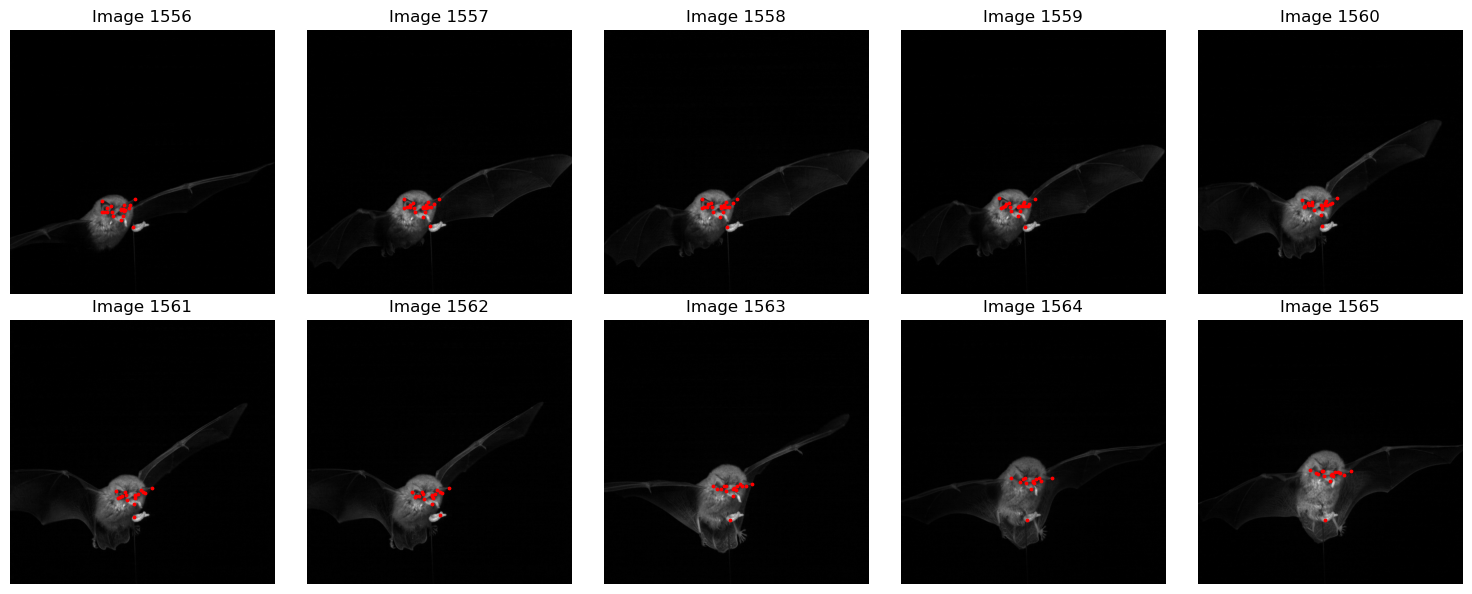

--------------------------------------------------
Processing file: /Users/marcusschou/Desktop/SDU/data_science/kurser_4/Speciale_Data_Science/code/data/wing_annotation_data_dau_merged11_20240513.h5
Loaded Images Shape: (10, 1024, 1024, 1)
Loaded Keypoints Shape: (10, 39, 2)


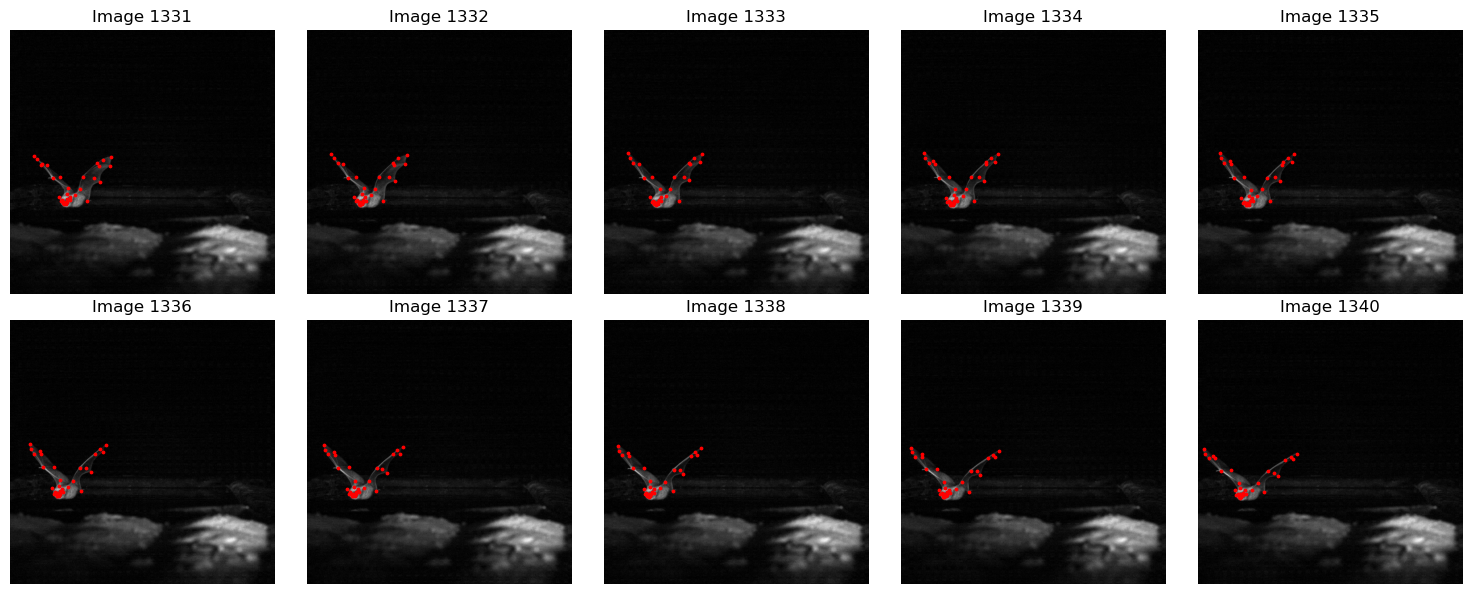

--------------------------------------------------


In [19]:
for h5_file_path in h5_file_paths:
    print(f"Processing file: {h5_file_path}")

    try:
        with h5py.File(h5_file_path, "r") as file:
            # Loading the last 10 frames with the corresponding annotated points.
            images = file["images"][-10:]  
            keypoints = file["annotations"][-10:]  

            # Printing the shapes of the datasets after slicing:
            print("Loaded Images Shape:", images.shape)  # res: 1024x1024
            print("Loaded Keypoints Shape:", keypoints.shape)  

            # Displaying the images with the corresponding keypoints:
            fig, axes = plt.subplots(2, 5, figsize=(15, 6))  
            axes = axes.flatten() 

            for i, ax in enumerate(axes):
                ax.imshow(images[i], cmap='gray') 
                ax.axis("off")

                kpts = keypoints[i] 
                ax.scatter(kpts[:, 0], kpts[:, 1], c="red", marker="o", s=3) 

                ax.set_title(f"Image {len(file['images']) - 10 + i}")

            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"Error processing {h5_file_path}: {e}")
    
    print("-" * 50)  


In [33]:
h5_file = "/Users/marcusschou/Desktop/SDU/data_science/kurser_4/Speciale_Data_Science/code/data/wing_annotation_data_dau_merged11_20240513.h5"


with h5py.File(h5_file, "r") as f:
    images = f["images"][:]  
    annotations = f["annotations"][:]  
    skeleton = f["skeleton"][:]  

def plot_frame(frame_idx):
    img = images[frame_idx, :, :, 0]  
    keypoints = annotations[frame_idx]  

    num_keypoints = keypoints.shape[0]
    
    print(f"\nFrame {frame_idx} - Number of keypoints: {num_keypoints}")
    for i, (x, y) in enumerate(keypoints):
        print(f"Keypoint {i}: (x={x:.2f}, y={y:.2f})")

    plt.figure(figsize=(8, 8))  
    plt.imshow(img, cmap="gray")
    plt.scatter(keypoints[:, 0], keypoints[:, 1], c="red", marker="o", s=5, label="Annotations")

    plt.legend()
    plt.title(f"Frame {frame_idx}")
    plt.axis("off")
    plt.show()


Frame 1340 - Number of keypoints: 39
Keypoint 0: (x=161.00, y=676.00)
Keypoint 1: (x=162.00, y=681.00)
Keypoint 2: (x=166.00, y=685.00)
Keypoint 3: (x=162.00, y=689.00)
Keypoint 4: (x=157.00, y=685.00)
Keypoint 5: (x=172.00, y=679.00)
Keypoint 6: (x=157.00, y=678.00)
Keypoint 7: (x=181.00, y=659.00)
Keypoint 8: (x=142.00, y=660.00)
Keypoint 9: (x=186.00, y=674.00)
Keypoint 10: (x=174.00, y=670.00)
Keypoint 11: (x=153.00, y=674.00)
Keypoint 12: (x=148.00, y=678.00)
Keypoint 13: (x=209.00, y=658.00)
Keypoint 14: (x=230.00, y=632.00)
Keypoint 15: (x=269.00, y=587.00)
Keypoint 16: (x=292.00, y=593.00)
Keypoint 17: (x=nan, y=nan)
Keypoint 18: (x=338.00, y=544.00)
Keypoint 19: (x=358.00, y=532.00)
Keypoint 20: (x=309.00, y=606.00)
Keypoint 21: (x=366.00, y=540.00)
Keypoint 22: (x=382.00, y=519.00)
Keypoint 23: (x=162.00, y=653.00)
Keypoint 24: (x=159.00, y=632.00)
Keypoint 25: (x=87.00, y=584.00)
Keypoint 26: (x=128.00, y=581.00)
Keypoint 27: (x=67.00, y=537.00)
Keypoint 28: (x=42.00, y=537

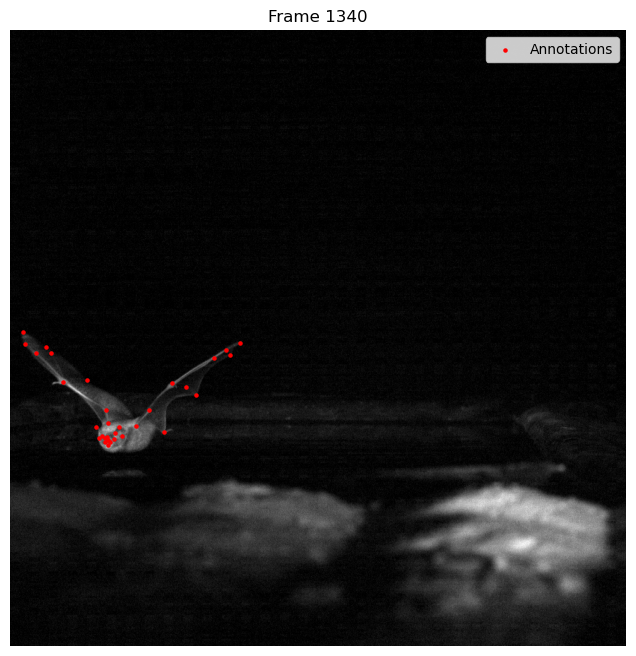

In [34]:
plot_frame(1340)


Frame 443 - Number of keypoints: 39
Keypoint 0: (x=-1.00, y=-1.00)
Keypoint 1: (x=956.84, y=785.56)
Keypoint 2: (x=996.08, y=924.44)
Keypoint 3: (x=956.28, y=784.52)
Keypoint 4: (x=957.40, y=783.92)
Keypoint 5: (x=952.28, y=818.24)
Keypoint 6: (x=948.12, y=822.96)
Keypoint 7: (x=969.76, y=832.88)
Keypoint 8: (x=958.32, y=818.72)
Keypoint 9: (x=970.64, y=832.12)
Keypoint 10: (x=957.80, y=821.00)
Keypoint 11: (x=943.40, y=834.12)
Keypoint 12: (x=969.52, y=832.60)
Keypoint 13: (x=995.52, y=924.12)
Keypoint 14: (x=996.44, y=924.04)
Keypoint 15: (x=901.48, y=823.84)
Keypoint 16: (x=996.72, y=922.80)
Keypoint 17: (x=910.80, y=756.24)
Keypoint 18: (x=854.16, y=801.84)
Keypoint 19: (x=909.04, y=754.32)
Keypoint 20: (x=911.88, y=753.52)
Keypoint 21: (x=996.24, y=924.24)
Keypoint 22: (x=910.92, y=754.04)
Keypoint 23: (x=914.08, y=823.00)
Keypoint 24: (x=970.36, y=833.12)
Keypoint 25: (x=911.04, y=754.28)
Keypoint 26: (x=911.20, y=759.64)
Keypoint 27: (x=995.80, y=924.16)
Keypoint 28: (x=910.68,

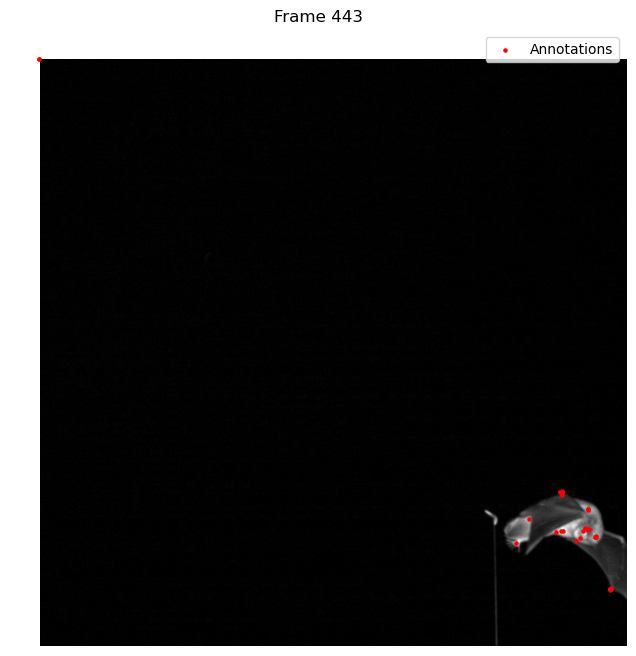

In [35]:
plot_frame(443)


Frame 37 - Number of keypoints: 39
Keypoint 0: (x=-1.00, y=-1.00)
Keypoint 1: (x=736.32, y=136.00)
Keypoint 2: (x=792.04, y=817.28)
Keypoint 3: (x=732.92, y=139.68)
Keypoint 4: (x=758.24, y=189.28)
Keypoint 5: (x=791.60, y=816.36)
Keypoint 6: (x=735.64, y=135.32)
Keypoint 7: (x=772.84, y=266.36)
Keypoint 8: (x=773.32, y=265.80)
Keypoint 9: (x=758.48, y=192.28)
Keypoint 10: (x=681.00, y=67.24)
Keypoint 11: (x=773.08, y=268.52)
Keypoint 12: (x=758.68, y=192.68)
Keypoint 13: (x=773.64, y=266.84)
Keypoint 14: (x=774.88, y=267.68)
Keypoint 15: (x=773.36, y=267.32)
Keypoint 16: (x=729.28, y=123.36)
Keypoint 17: (x=685.60, y=69.08)
Keypoint 18: (x=790.60, y=817.44)
Keypoint 19: (x=791.12, y=819.08)
Keypoint 20: (x=773.12, y=268.40)
Keypoint 21: (x=772.64, y=268.32)
Keypoint 22: (x=773.16, y=268.08)
Keypoint 23: (x=758.88, y=192.48)
Keypoint 24: (x=774.44, y=267.72)
Keypoint 25: (x=791.68, y=815.16)
Keypoint 26: (x=732.00, y=124.36)
Keypoint 27: (x=685.48, y=68.60)
Keypoint 28: (x=792.04, y=8

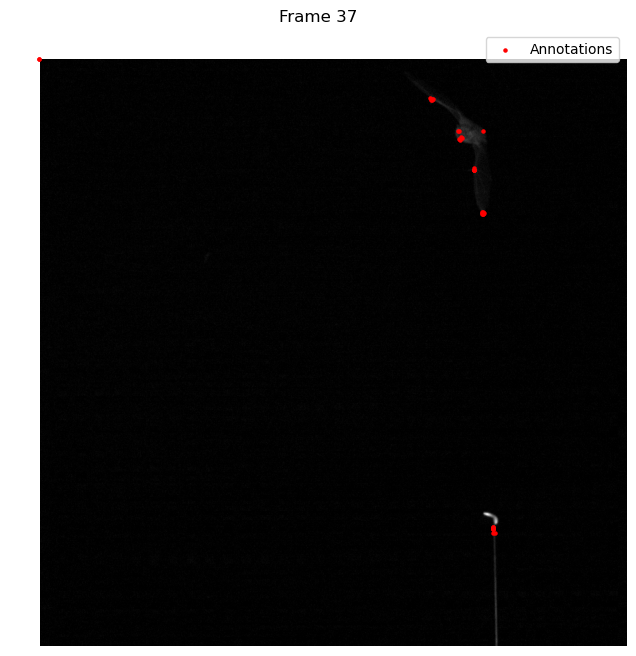

In [36]:
plot_frame(37)

In [31]:
import h5py

def print_structure(name: str, obj: h5py.Dataset, index: int):
    """Prints dataset details and retrieves a specific index from it."""
    if name == "annotated":  # Only process the 'annotated' dataset
        if obj.shape and obj.size > 0:
            if 0 <= index < obj.shape[0]:  # Ensure index is within bounds
                element = obj[index]
            else:
                element = "Index out of bounds"
        else:
            element = "Empty dataset"

        print(f"Dataset: {name}, Shape: {obj.shape}, Type: {obj.dtype}, Content at index {index}: {element}")

# Define the index you want to inspect
index_to_fetch = 50  # Change this to any desired index

for h5_file_path in h5_file_paths:
    print(f"Inspecting file: {h5_file_path}")
    with h5py.File(h5_file_path, "r") as file:
        if "annotated" in file:  # Check if 'annotated' exists in the file
            print_structure("annotated", file["annotated"], index_to_fetch)
        else:
            print("Dataset 'annotated' not found in the file.")
    print("-" * 50)


Inspecting file: /Users/marcusschou/Desktop/SDU/data_science/kurser_4/Speciale_Data_Science/data/head_annotation_data_nat_updated_v2.h5
Dataset: annotated, Shape: (1566, 20), Type: bool, Content at index 50: [False False False False False False False False False False False False
 False False False False False False False False]
--------------------------------------------------
Inspecting file: /Users/marcusschou/Desktop/SDU/data_science/kurser_4/Speciale_Data_Science/data/wing_annotation_data_dau_merged11_20240513.h5
Dataset: annotated, Shape: (1341, 39), Type: bool, Content at index 50: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False]
--------------------------------------------------


_Preprocessing if all points marked as false in annotated this frame should be ignored and not be used in training, it is set with r hot key in deepposekit annotator_